<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


Using TensorFlow backend.


In [3]:
!unzip Archive.zip


Archive:  Archive.zip
   creating: real/
  inflating: real/RackMultipart20200416-3319-30q81a.jpg  
   creating: __MACOSX/
   creating: __MACOSX/real/
  inflating: __MACOSX/real/._RackMultipart20200416-3319-30q81a.jpg  
  inflating: real/RackMultipart20200503-25959-1dlurcm.jpg  
  inflating: __MACOSX/real/._RackMultipart20200503-25959-1dlurcm.jpg  
  inflating: real/IMG_2947(20200415-235546).JPG  
  inflating: __MACOSX/real/._IMG_2947(20200415-235546).JPG  
  inflating: real/RackMultipart20200503-25959-kj84jd.jpg  
  inflating: __MACOSX/real/._RackMultipart20200503-25959-kj84jd.jpg  
  inflating: real/RackMultipart20200503-25510-160a0cp.jpg  
  inflating: __MACOSX/real/._RackMultipart20200503-25510-160a0cp.jpg  
  inflating: real/RackMultipart20200503-26620-1akr951.jpg  
  inflating: __MACOSX/real/._RackMultipart20200503-26620-1akr951.jpg  
  inflating: real/RackMultipart20200416-10900-1nygbuw.jpg  
  inflating: __MACOSX/real/._RackMultipart20200416-10900-1nygbuw.jpg  
  inflating: real

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('real', '*.JPG', '%s'+ " real")
rename('fake', '*.JPG', '%s'+ " fake")
rename('real', '*.jpg', '%s'+ " real")
rename('fake', '*.jpg', '%s'+ " fake")

In [0]:
# prepare data
import random
train_real = ['./real/{}'.format(i) for i in os.listdir("real") if 'real' in i]
train_fake = ['./fake/{}'.format(i) for i in os.listdir("fake") if 'fake' in i]
train_images = train_fake + train_real
random.shuffle(train_images)

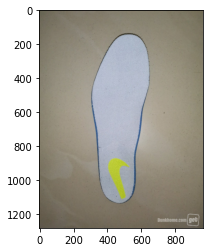

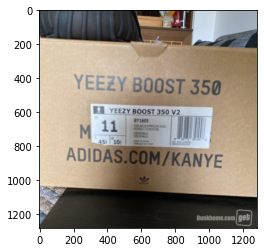

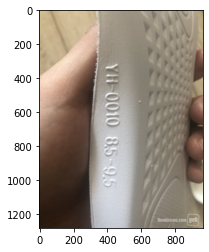

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'real' in image:
            y.append(1)
        elif 'fake' in image:
            y.append(0)
    
    return X, y

In [0]:
# put traing image into x , y
X, y = read_and_process_image(train_images)
X = np.array(X)
y = np.array(y)

In [9]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (2085, 150, 150, 3)
Shape of labels is: (2085,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers


In [21]:
model = Sequential()

#add conv1
model.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)

#r = model.fit(x_train,y_train,batch_size=100,epochs=100)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

ValueError: ignored

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4610      
Total params: 24,002
Trainable params: 24,002
Non-trainable params: 0
____________________________________________________

In [13]:
y_result = model.predict(x_test)
diff_count = 0
y_test_array =[]
print(len(y_test))
print(y_result)
for i in range(len(y_result)):
  #print(y_result[i][0])
  if y_result[i][0] > 0.9:
    y_test_array.append(1)
  elif y_result[i][1] > 0.9:
    y_test_array.append(0)


print(y_test_array)
#print(sum)
#print("accuracy:", 
#      sum/len(y_result))


417
[[9.90552068e-01 9.44791175e-03]
 [9.53819811e-01 4.61801812e-02]
 [9.98715878e-01 1.28409511e-03]
 [9.91831601e-01 8.16845894e-03]
 [6.34808064e-01 3.65191936e-01]
 [8.55063722e-02 9.14493620e-01]
 [3.51727903e-01 6.48272038e-01]
 [9.99520898e-01 4.79118171e-04]
 [7.38593265e-02 9.26140666e-01]
 [9.44416106e-01 5.55839092e-02]
 [4.09869492e-01 5.90130508e-01]
 [8.41096520e-01 1.58903494e-01]
 [5.13520479e-01 4.86479461e-01]
 [4.45142905e-06 9.99995589e-01]
 [9.23651271e-04 9.99076366e-01]
 [2.36717650e-08 1.00000000e+00]
 [4.21255231e-01 5.78744769e-01]
 [5.14153779e-01 4.85846251e-01]
 [6.53870131e-07 9.99999404e-01]
 [9.96321321e-01 3.67871323e-03]
 [9.85396802e-02 9.01460350e-01]
 [1.00000000e+00 3.97935729e-08]
 [9.99517798e-01 4.82224626e-04]
 [9.96872365e-01 3.12769273e-03]
 [4.01445657e-01 5.98554313e-01]
 [9.99951363e-01 4.86834215e-05]
 [1.86825798e-06 9.99998093e-01]
 [1.36092154e-03 9.98639047e-01]
 [9.57910061e-01 4.20899019e-02]
 [1.05403837e-04 9.99894619e-01]
 [1.71